#### 시각화

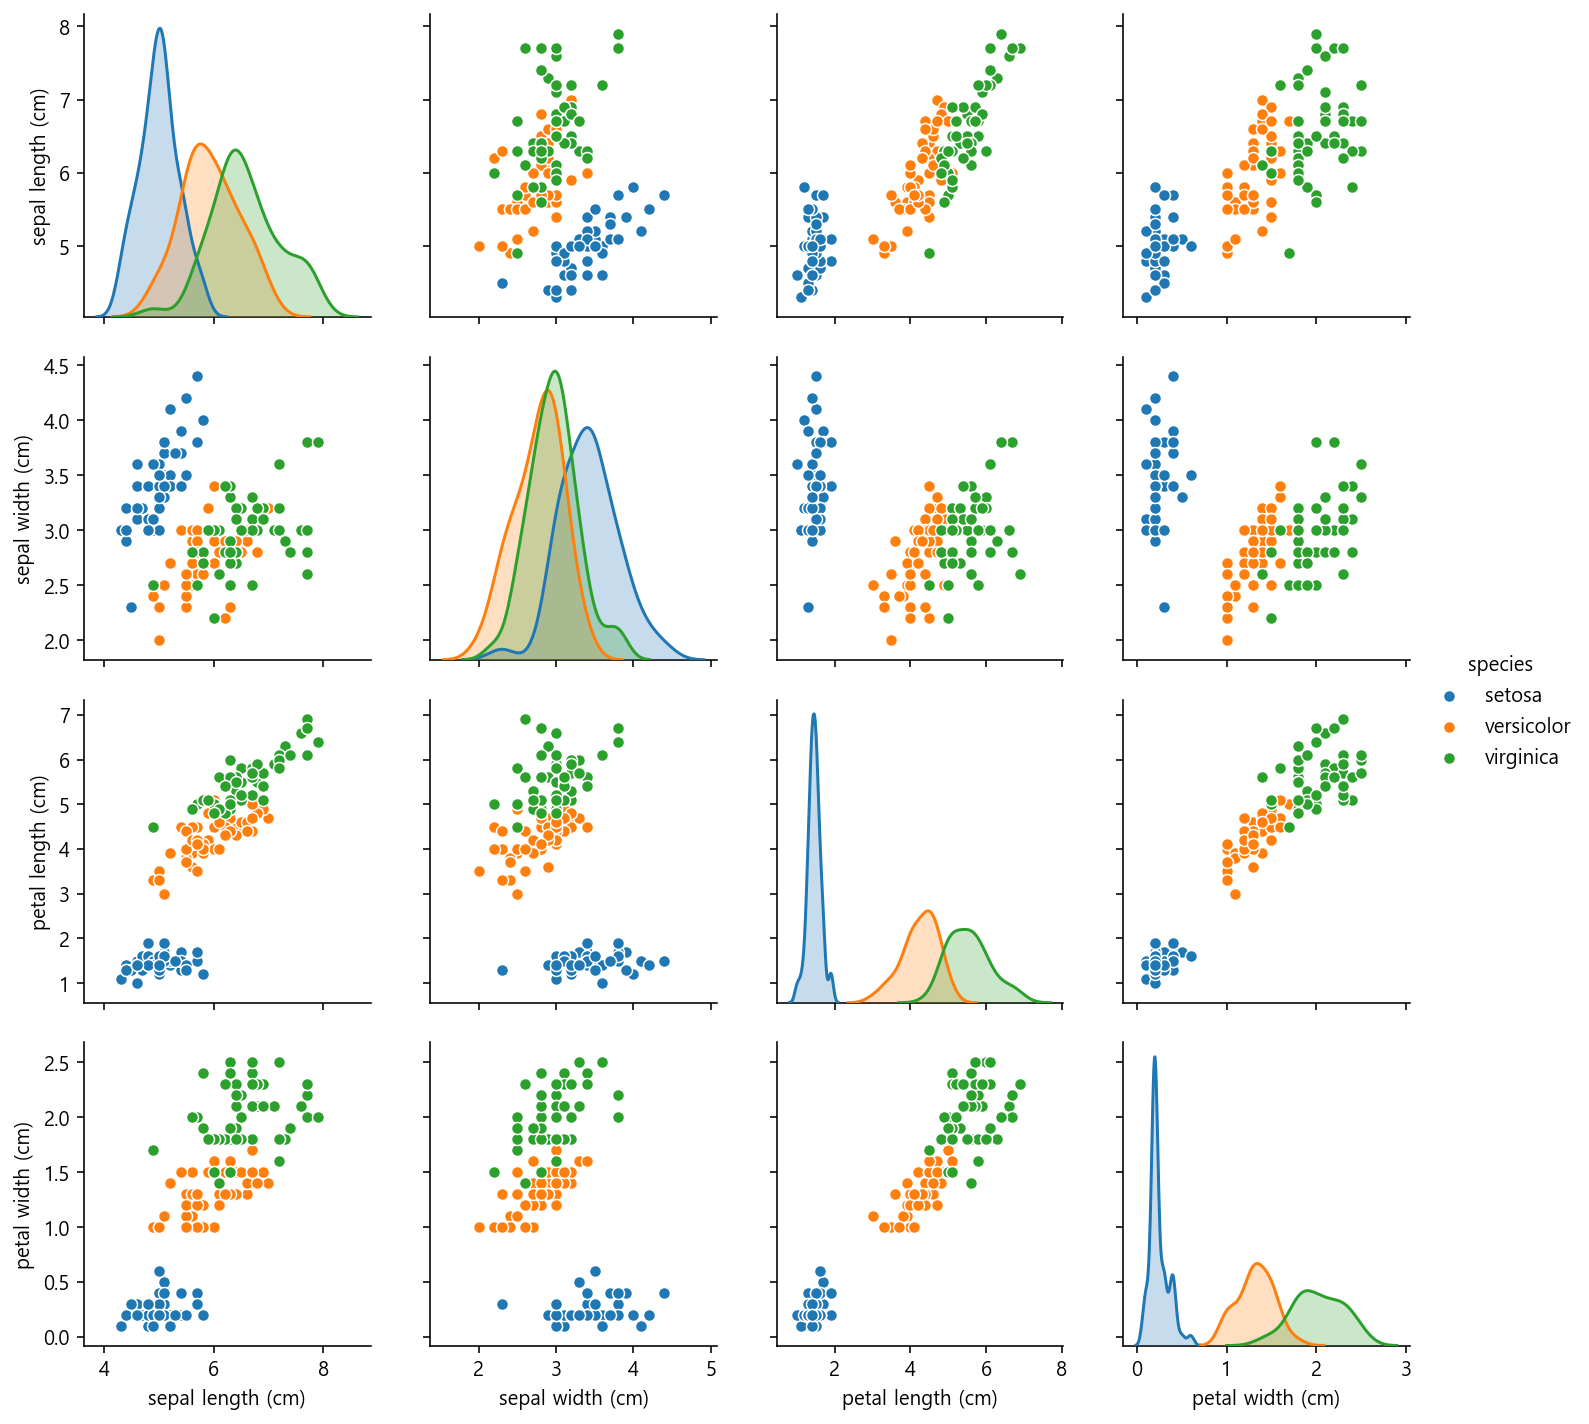

In [4]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
sy = pd.Series(iris.target, dtype="category")
sy = sy.cat.rename_categories(iris.target_names)
df['species'] = sy
sns.pairplot(df, hue="species")
plt.show()


## 분류용 데이터 생성
### make_classification
- Scikit-Learn 패키지
- `make_classification`함수는 설정에 따른 분류용 가상 데이터를 생성하는 명령

* 인수:	
 * `n_samples` : 표본 데이터의 수, 디폴트 100
 * `n_features` : 독립 변수의 수, 디폴트 20
 * `n_informative` : 독립 변수 중 종속 변수와 상관 관계가 있는 성분의 수, 디폴트 2
 * `n_redundant` : 독립 변수 중 다른 독립 변수의 선형 조합으로 나타나는 성분의 수, 디폴트 2
 * `n_repeated` : 독립 변수 중 단순 중복된 성분의 수, 디폴트 0
 * `n_classes` : 종속 변수의 클래스 수, 디폴트 2
 * `n_clusters_per_class` : 클래스 당 클러스터의 수, 디폴트 2
 * `weights` : 각 클래스에 할당된 표본 수, 클래스별 데이터 갯수에 차이를 주고싶을때 사용,list형식으로 인수 삽입
 * `random_state` : 난수 발생 시드    
  
* 반환값:	
 * `X` : [n_samples, n_features] 크기의 배열 
    * 독립 변수
 * `y` : [n_samples] 크기의 배열 
    * 종속 변수


### make_blobs
`make_blobs` 함수는 등방성 가우시안 정규분포를 이용해 가상 데이터를 생성한다. 이 때 등방성이라는 말은 모든 방향으로 같은 성질을 가진다는 뜻이다. 
타원모형으로 클러스터가 생긴다

* 인수:	
 * `n_samples` : 표본 데이터의 수, 디폴트 100
 * `n_features` : 독립 변수의 수, 디폴트 20
 * `centers` : 생성할 클러스터의 수 혹은 중심, [n_centers, n_features] 크기의 배열. 디폴트 3
 * `cluster_std`: 클러스터의 표준 편차, 디폴트 1.0
 * `center_box`: 생성할 클러스터의 바운딩 박스(bounding box), 디폴트 (-10.0, 10.0)) 
   
* 반환값:	
 * `X` : [n_samples, n_features] 크기의 배열 
    * 독립 변수
 * `y` : [n_samples] 크기의 배열 
    * 종속 변수

### make_moons
`make_moons` 함수는 초승달 모양 클러스터 두 개 형상의 데이터를 생성한다. `make_moons` 명령으로 만든 데이터는 직선을 사용하여 분류할 수 없다.

* 인수:	
 * `n_samples` : 표본 데이터의 수, 디폴트 100
 * `noise`: 잡음의 크기. 0이면 정확한 반원을 이룸

### make_gaussian_quantiles
`make_gaussian_quantiles` 함수는 다차원 가우시안 분포의 표본을 생성하고 분포의 기대값을 중심으로 한 등고선으로 클래스를 분리한다. 
* 인수:	
 * `mean`: 기댓값 벡터
 * `cov`: 공분산 행렬
 * `n_samples` : 표본 데이터의 수, 디폴트 100
 * `n_features` : 독립 변수의 수, 디폴트 20
 * `n_classes` : 클래스의 수
    
* 반환값:	
 * `X` : [n_samples, n_features] 크기의 배열 
    * 독립 변수
 * `y` : [n_samples] 크기의 배열 
    * 종속 변수

## 분류모형
- 분류(classification)문제는 독립변수값이 주어졌을 때 그 값과 가장 연관성이 큰 종속변수값(클래스)을 예측하는 문제
- 분류문제를 푸는 방법을 분류모형

### 분류모형의 종류
1. 확률적 모형 (조건부 확률을 계산하는 모형)
    - 확률적 판별(discriminative) 모형 : 조건부확률 함수의 모양을 추정
    - 확률적 생성(generative)모형 : 베이즈 정리를 사용하여 간접적으로 조건부 확률을 구하는 모형
        
2. 판별함수 모형
    - 데이터를 카테고리에 따라 서로 다른 영역으로 나누는 경계면을 찾아내고, 주어진 데이터가 어느 위치에 있는지 계산하는 판별함수(discriminant function)을 이용
    
    

| 모형 | 방법론 | 
|-|-|
| LDA/QDA  | 확률적 생성모형 |
| 나이브 베이지안 | 확률적 생성모형 |
| 로지스틱 회귀 | 확률적 판별모형 |
| 의사결정나무 | 확률적 판별모형 |
| 퍼셉트론 | 판별함수 모형 |
| 서포트벡터머신 | 판별함수 모형 |
| 인공신경망 | 판별함수 모형 |

#### 1. 확률적 모형
>  입력 $x$가 주어졌을 때 $y$가 클래스 $k$가 될 확률 $P(y=k \mid x )$을 모두 계산하고,
> 이 중에서 가장 확률이 큰 클래스를 선택하는 방법

    1.1 확률적 생성모형
   $$ P(y=k \mid x) = \dfrac{P(x \mid y=k)P(y=k)}{P(x)} $$
  
   전체확률의 법칙을 이용하여
   $$ P(x) = \sum_{k=1}^K P(x \mid y=k)P(y=k) $$
  

#### QDA
QDA(Quadratic Discriminant Analysis)는 조건부확률 기반 생성(generative) 모형의 하나이다. 예를 들어 다음과 같이 두 가지 클래스의 데이터가 있다고 하자. 스캐터 플롯의 데이터 색은 각 데이터의 클래스를 나타낸다. 검은색은 $y=0$인 클래스이고 흰색은 $y=1$인 클래스이다. 3개씩으로 이루어진 두 클래스 데이터가 서로 대칭을 이루고 있다는 점에 주의하자.

테스트 데이터가 $y=1$인 클래스에 더 가깝다면 $P(y=1|x_{\text{test}})$가 0.5보다 커지게 된다.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


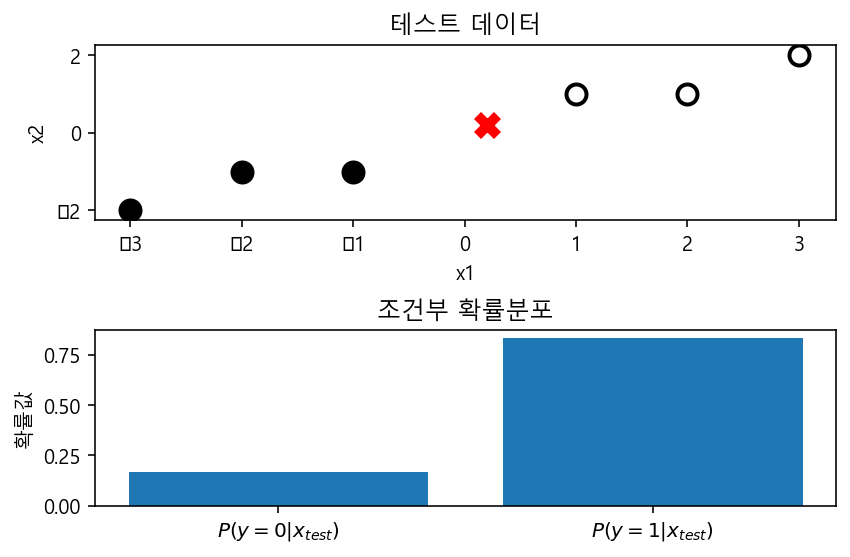

In [13]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y = np.array([0, 0, 0, 1, 1, 1])
model = QuadraticDiscriminantAnalysis().fit(X, y)

x = [[0.2, 0.2]]
p = model.predict_proba(x)[0]

plt.subplot(211)
plt.scatter(X[:3, 0], X[:3, 1], c="k", s=100, edgecolor='k', linewidth=2, label="y=0")
plt.scatter(X[3:, 0], X[3:, 1], c="w", s=100, edgecolor='k', linewidth=2, label="y=1")
plt.scatter(x[0][0], x[0][1], c='r', s=100, marker='x', edgecolor='k', linewidth=5)
plt.title("테스트 데이터")
plt.xlabel("x1")
plt.ylabel("x2")
plt.subplot(212)
plt.bar(model.classes_, p)
plt.title("조건부 확률분포")
plt.gca().xaxis.grid(False)
plt.xticks(model.classes_, ["$P(y=0|x_{test})$", "$P(y=1|x_{test})$"])
plt.ylabel("확률값")
plt.tight_layout()
plt.show()

#### 나이브 베이지안 모형
- 조건부 확률 기반 생성모형의 장점 중 하나는 클래스가 3개 이상인 경우에도 바로 적용할 수 있다는점
- 나이브 베이지안 모형도 조건부 확률 모형중 하나
- ex)20 뉴스그룹 분류문제를 나이브 베이지안 모형을 사용
    - 특정한 데이터가 20개의 카테고리에 속할 확률 계산

```
1.2 확률적 판별 모형
```
확률론적 판별 모형(probabilistic discriminative model)은 조건부확률 $p(y=1 \mid x)$이 $x$에 대한 함수 $f(x)$로 표시될 수 있다고 가정하고 그 함수를 직접 찾아내는 방법이다. 

$$ p(y = k \mid x) = f(x) $$


단, 이 함수 $f(x)$는 0보다 같거나 크고 1보다 같거나 작다는 조건을 만족해야 한다.

#### 로지스틱 회귀 모형

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


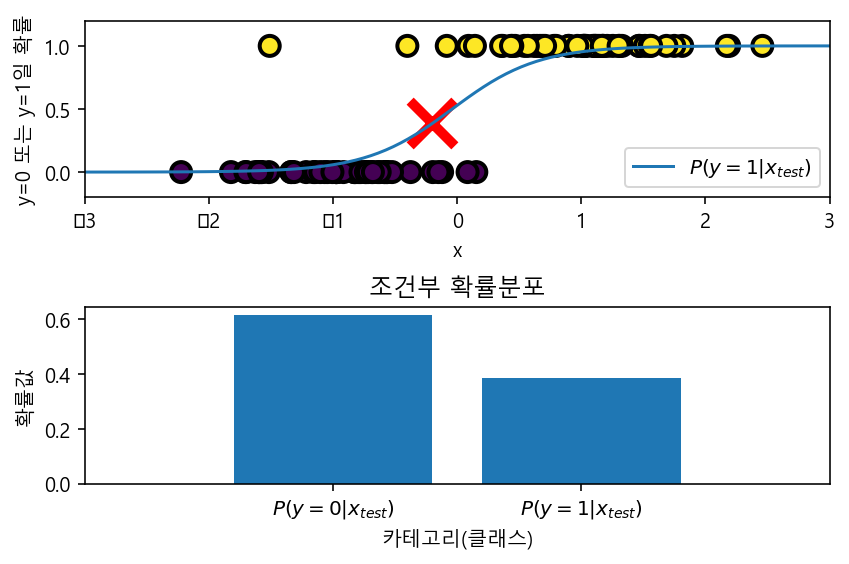

In [14]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

X0, y = make_classification(n_features=1, n_redundant=0,
                            n_informative=1, n_clusters_per_class=1, random_state=4)
model = LogisticRegression().fit(X0, y)

xx = np.linspace(-3, 3, 100)
XX = xx[:, np.newaxis]
prob = model.predict_proba(XX)[:, 1]
# prob = 1.0/(1 + np.exp(-model.coef_[0][0]*xx - model.intercept_[0]))

x_test = [[-0.2]]

plt.subplot(211)
plt.plot(xx, prob)
plt.scatter(X0, y, marker='o', c=y, s=100, edgecolor='k', linewidth=2)
plt.scatter(x_test[0], model.predict_proba(x_test)[0][1:], marker='x', s=500, c='r', lw=5)
plt.xlim(-3, 3)
plt.ylim(-.2, 1.2)
plt.xlabel("x")
plt.ylabel("y=0 또는 y=1일 확률")
plt.legend(["$P(y=1|x_{test})$"])
plt.subplot(212)
plt.bar(model.classes_, model.predict_proba(x_test)[0])
plt.xlim(-1, 2)
plt.gca().xaxis.grid(False)
plt.xticks(model.classes_, ["$P(y=0|x_{test})$", "$P(y=1|x_{test})$"])
plt.title("조건부 확률분포")
plt.xlabel("카테고리(클래스)")
plt.ylabel("확률값")
plt.tight_layout()
plt.show()

빨간색 X표시 지점의 x일때 y=0으로 분류한다

### 판별함수 모형
또 다른 분류 방법은 동일한 클래스가 모여 있는 영역과 그 영역을 나누는 경계면(boundary plane)을 정의하는 것이다.
이 경계면은 경계면으로부터의 거리를 계산하는 $f(x)$ 형태의 함수인 **판별함수(discriminant function)**로 정의된다. 판별함수의 값의 부호에 따라 클래스가 나뉘어진다.

$$ \text{판별 경계선}: \;\; f(x) = 0 $$

$$ \text{클래스 1}: \;\; f(x) > 0 $$

$$ \text{클래스 0}: \;\; f(x) < 0 $$

#### 퍼셉트론
- 가장 단순한 판별함수 모형
- 직선을 경계선으로 데이터 영역을 나눈다

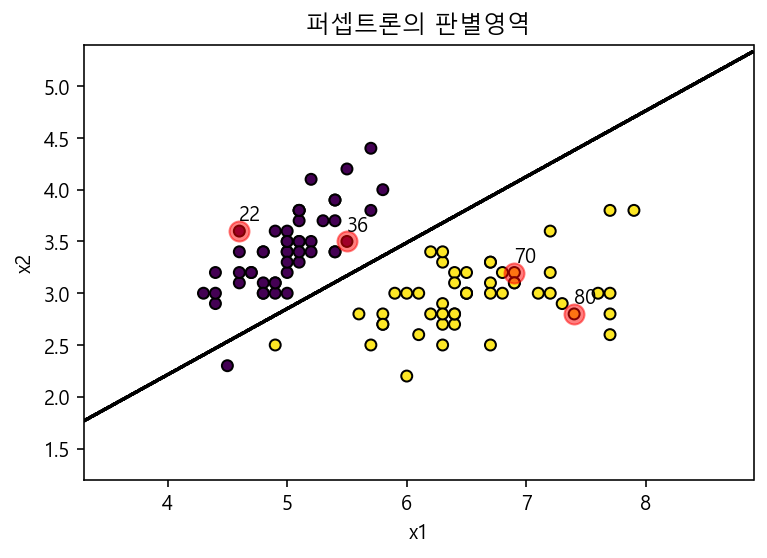

In [15]:
from sklearn.linear_model import Perceptron
from sklearn.datasets import load_iris
iris = load_iris()
idx = np.in1d(iris.target, [0, 2]) #두가지 밖에 판별 못한다고 해서 0,2인지 고르는 문제로 바꿈
X = iris.data[idx, 0:2]
y = iris.target[idx]

model = Perceptron(max_iter=100, eta0=0.1, random_state=1).fit(X, y)
XX_min, XX_max = X[:, 0].min() - 1, X[:, 0].max() + 1
YY_min, YY_max = X[:, 1].min() - 1, X[:, 1].max() + 1
XX, YY = np.meshgrid(np.linspace(XX_min, XX_max, 1000),
                     np.linspace(YY_min, YY_max, 1000))
ZZ = model.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
plt.contour(XX, YY, ZZ, colors='k')
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolor='k', linewidth=1)

idx = [22, 36, 70, 80]
plt.scatter(X[idx, 0], X[idx, 1], c='r', s=100, alpha=0.5)
for i in idx:
    plt.annotate(i, xy=(X[i, 0], X[i, 1] + 0.1))
plt.grid(False)
plt.title("퍼셉트론의 판별영역")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

### 커널 SVM
- 커널 SVM(Kernel Support Vector Machine)을 사용하면 다음과 같이 복잡한 형태의 경계선을 생성할 수도 있다.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


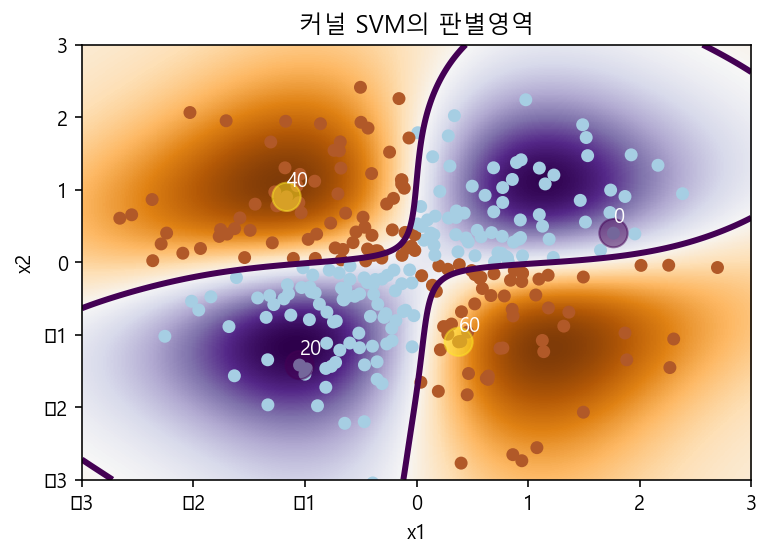

In [17]:
from sklearn import svm

xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                     np.linspace(-3, 3, 500))
np.random.seed(0)
X = np.random.randn(300, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

model = svm.NuSVC().fit(X, Y)
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', cmap=plt.cm.PuOr_r)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=3)
plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired)
idx = [0, 20, 40, 60]
plt.scatter(X[idx, 0], X[idx, 1], c=Y[idx], s=200, alpha=0.5)
for i in idx:
    plt.annotate(i, xy=(X[i, 0], X[i, 1]+0.15), color='white')
plt.grid(False)
plt.axis([-3, 3, -3, 3])
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("커널 SVM의 판별영역")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


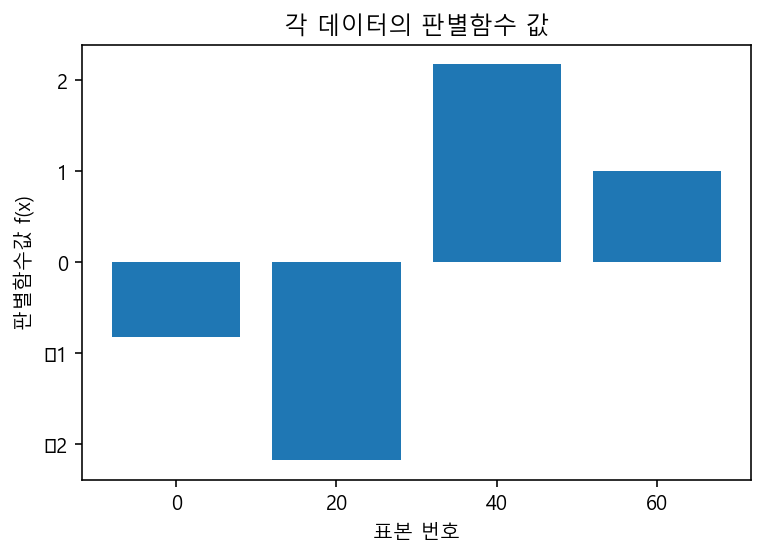

In [18]:
plt.bar(range(len(idx)), model.decision_function(X[idx]))
plt.xticks(range(len(idx)), idx)
plt.gca().xaxis.grid(False)
plt.xlabel("표본 번호")
plt.ylabel("판별함수값 f(x)")
plt.title("각 데이터의 판별함수 값")
plt.show()

### 다중클래스 분류
- 판별함수 모형은 종속변수의 클래스가 2개인 경우(이진 분류문제)밖에 풀지 못한다
- 확률적 모형은 클래스가 3개 이상인 경우(다중클래스 분류문제)도 풀 수 있다.

1. OvO (One-Vs-One) 방법
>  $K$개의 클래스가 존재하는 경우, 이 중 2개의 클래스 조합을 선택하여 $K(K - 1)/2$개의 이진 클래스 분류문제를 풀고  이진 분류문제를 풀어 가장 많은 결과가 나온 클래스를 선택하는 방법이다. 선택받은 횟수로 선택하면 횟수가 같은 경우도 나올 수 있기 때문에 각 클래스가 얻은 조건부 확률값을 모두 더한 값을 비교하여 가장 큰 조건부 확률 총합을 가진 클래스를 선택한다.
>>  리그전처럼 처리4팀 => 4C2 = 3*4/2 경우의수
동점일 경우 판별함수의 값을 이용해서 승점으로 친다
클래스가 여러개인데 퍼셉트론으로밖에 할 수 없는 경우
>>>문제점: 경우의 수만큼 시도해야 분류를 할 수 있기 때문에 계산이 복잡하다. 

2. OvR (One-vs-the-Rest) 방법
>  $K$개의 클래스가 존재하는 경우, 각각의 클래스에 대해 표본이 속하는지(y=1) 속하지 않는지(y=0)의 이진 분류문제를 푼다. OvO에 비해 클래스 수만큼의 이진 분류문제를 푸면 되기 때문에 클래수 수가 많아져도 상대적으로 연산이 많이 들지 않는다.
>> OvR에서도 판별 결과의 수가 같은 동점 문제가 발생할 수가 있기 때문에 각 클래스가 얻은 조건부 확률값을 더해서 이 값이 가장 큰 클래스를 선택한다.

## 분류 성능 평가

-  분류결과표(Confusion Matrix)는 타겟의 원래 클래스와 모형이 예측한 클래스가 일치하는지는 갯수로 센 결과를 표나 나타낸 것이다.
정답 클래스는 행(row)으로 예측한 클래스는 열(column)로 나타낸다.
- 대각선에 있는 갯수가 많을수록 좋다

| <span/> | 예측 클래스 0 | 예측 클래스 1 | 예측 클래스 2 | 
|------|------|------|------|
| 정답 클래스 0 | <small>정답 클래스가 0, 예측 클래스가 0인 표본의 수</small> | <small>정답 클래스가 0, 예측 클래스가 1인 표본의 수</small> | <small>정답 클래스가 0, 예측 클래스가 2인 표본의 수</small> |
| 정답 클래스 1 | <small>정답 클래스가 1, 예측 클래스가 0인 표본의 수</small> | <small>정답 클래스가 1, 예측 클래스가 1인 표본의 수</small> | <small>정답 클래스가 1, 예측 클래스가 2인 표본의 수</small> |
| 정답 클래스 2 | <small>정답 클래스가 2, 예측 클래스가 0인 표본의 수</small> | <small>정답 클래스가 2, 예측 클래스가 1인 표본의 수</small> | <small>정답 클래스가 2, 예측 클래스가 2인 표본의 수</small> |

## 평가점수
1. 정확도 (True)
> 정확도(accuracy)는 전체 샘플 중 맞게 예측한 샘플 수의 비율을 뜻한다. 높을수록 좋은 모형이다. 일반적으로 학습에서 최적화 목적함수로 사용된다.
 
$$ \text{accuracy} = \dfrac{TP + TN}{TP + TN + FP + FN} $$

2. 정밀도(TP/p)
> 정밀도(precision)은 양성 클래스에 속한다고 출력한 샘플 중 실제로 양성 클래스에 속하는 샘플 수의 비율을 말한다. 높을수록 좋은 모형이다. FDS의 경우, 사기 거래라고 판단한 거래 중 실제 사기 거래의 비율이 된다.

$$\text{precision} = \dfrac{TP}{TP + FP}$$
 



3. 재현율(recall) (실제 양성중 맞춘비율)
> 재현율(recall)은 실제 양성 클래스에 속한 표본 중에 양성 클래스에 속한다고 출력한 표본의 수의 비율을 뜻한다. 높을수록 좋은 모형이다. FDS의 경우 실제 사기 거래 중에서 실제 사기 거래라고 예측한 거래의 비율이 된다. TPR(true positive rate) 또는 민감도(sensitivity)라고도 한다.

$$\text{recall} = \dfrac{TP}{TP + FN}$$

4. 위양성율(fall-out) (실제 음성인데 양성이라고 판단한 비율)
> 실제 양성 클래스에 속하지 않는 표본 중에 양성 클래스에 속한다고 출력한 표본의 비율을 말한다. 다른 평가점수와 달리 낮을수록 좋은 모형이다. FDS의 경우에는 실제로는 정상 거래인데 FDS가 사기 거래라고 예측한 거래의 비율이 된다. FPR(false positive rate)또는 1에서 위양성률의 값을 뺀 값을 특이도(specificity)라고도 한다. 

$$\text{fallout} = \dfrac{FP}{FP + TN}$$

#### F점수

정밀도와 재현율의 가중조화평균(weight harmonic average)을 F점수(F-score)라고 한다. 정밀도에 주어지는 가중치를 베타(beta)라고 한다.
 
$$
F_\beta = (1 + \beta^2) \, ({\text{precision} \times \text{recall}}) \, / \, ({\beta^2 \, \text{precision} + \text{recall}})
$$

베타가 1인 경우를 특별히 F1점수라고 한다.

$$
F_1 = 2 \cdot \text{precision} \cdot \text{recall} \, / \, (\text{precision} + \text{recall})
$$

In [22]:
from sklearn.metrics import classification_report

y_true = [0, 0, 0, 1, 1, 0, 0]
y_pred = [0, 0, 0, 0, 1, 1, 1]

print(classification_report(y_true, y_pred, target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.75      0.60      0.67         5
     class 1       0.33      0.50      0.40         2

    accuracy                           0.57         7
   macro avg       0.54      0.55      0.53         7
weighted avg       0.63      0.57      0.59         7



### ROC커브
ROC(Receiver Operator Characteristic) 커브는 클래스 판별 기준값의 변화에 따른 위양성률(fall-out)과 재현율(recall)의 변화를 시각화한 것이다.
<img src="https://datascienceschool.net/upfiles/831d9dfbdcee499c9e32f39831d757f2.png" width="100%">

<img src="https://datascienceschool.net/upfiles/219c35d779eb4eb38be3fa0cc6b9ed38.png" width="100%">

In [26]:
from sklearn.metrics import roc_curve
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

X, y = make_classification(n_samples=16, n_features=2,
                           n_informative=2, n_redundant=0,
                           random_state=0)

model = LogisticRegression().fit(X, y)
y_hat = model.predict(X)
f_value = model.decision_function(X)

fpr, tpr, thresholds = roc_curve(y, model.decision_function(X))
fpr, tpr, thresholds
#fallout, recall rate, thresholds
#결국 accuracy가 가장 높은 것을 고른다

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(array([0.   , 0.   , 0.   , 0.125, 0.125, 0.375, 0.375, 1.   ]),
 array([0.   , 0.125, 0.75 , 0.75 , 0.875, 0.875, 1.   , 1.   ]),
 array([ 3.16762769,  2.16762769,  1.03566193,  0.24472855, -0.06301587,
        -0.87838516, -1.02775912, -4.14855612]))

## AUC
AUC(Area Under the Curve)는 ROC curve의 면적을 뜻한다. 위양성률값이 같을 때 재현률값이 크거나 재현률값이 같을 때 위양성률값이 작을수록 AUC가 1에 가까운 값이고 좋은 모형이다.

### 다중클래스
다중 클래스에 대해서는 정밀도, 재현율을 구하거나 ROC 커브를 그릴 수 없으므로 각각의 클래스에 대해 OvR 문제를 가정하고 각각의 OvR 문제에 대해 ROC 커브를 그린다.

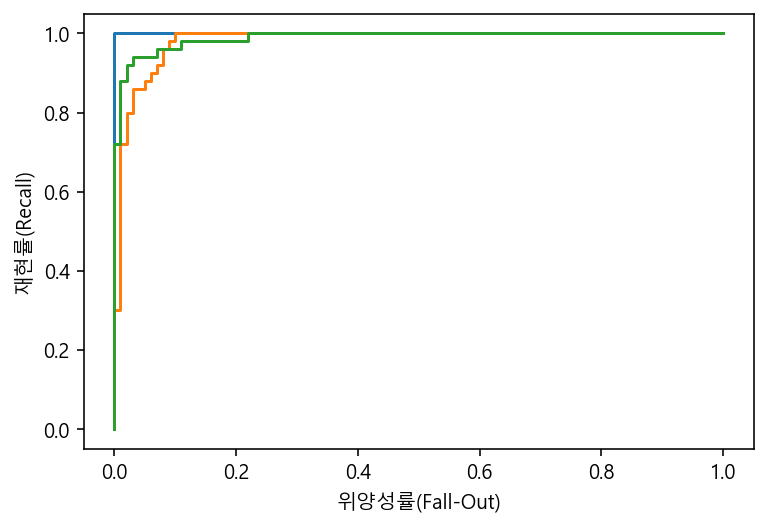

In [28]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.preprocessing import label_binarize

iris = load_iris()
X = iris.data
y = label_binarize(iris.target, [0, 1, 2])

fpr = [None] * 3
tpr = [None] * 3
thr = [None] * 3

for i in range(3):
    model = GaussianNB().fit(X, y[:, i])
    fpr[i], tpr[i], thr[i] = roc_curve(y[:, i], model.predict_proba(X)[:, 1])
    plt.plot(fpr[i], tpr[i])

plt.xlabel('위양성률(Fall-Out)')
plt.ylabel('재현률(Recall)')
plt.show()

In [1]:
# from sklearn.datasets import load_iris
# iris = load_iris()

In [29]:
# df = pd.DataFrame(iris.data, columns=iris.feature_names)
# sy = pd.Series(iris.target, dtype="category")
# sy = sy.cat.rename_categories(iris.target_names)
# df['species'] = sy
# df.tail()